Skipping invalid line: [
Skipping invalid line: {"name": "Easy Chicken and Broccoli Alfredo", "url": "https://www.allrecipes.com/recipe/212498/easy-chicken-and-broccoli-alfredo/", "category": ["Dinner"], "author": "Philadelphia", "summary": "This creamy chicken and broccoli Alfredo pasta dish with fresh broccoli, tender chunks of chicken breast, Parmesan cheese, and basil is sure to please!", "rating": "4.4", "rating_count": "158", "review_count": 0, "ingredients": "8 ounces fettuccine or spaghetti, uncooked; 2 cups fresh broccoli florets; 0.25 cup KRAFT Zesty Italian Dressing; 1 pound boneless skinless chicken breasts, cut into bite-sized pieces; 1.6666667461395 cups milk; 4 ounces PHILADELPHIA Cream Cheese, cubed; 0.25 cup KRAFT Grated Parmesan Cheese; 0.5 teaspoon dried basil leaves", "directions": "Cook pasta as directed on package, adding broccoli to the boiling water for the last 2 minutes of the pasta cooking time. Drain pasta mixture. Meanwhile, heat dressing in large nonstick 

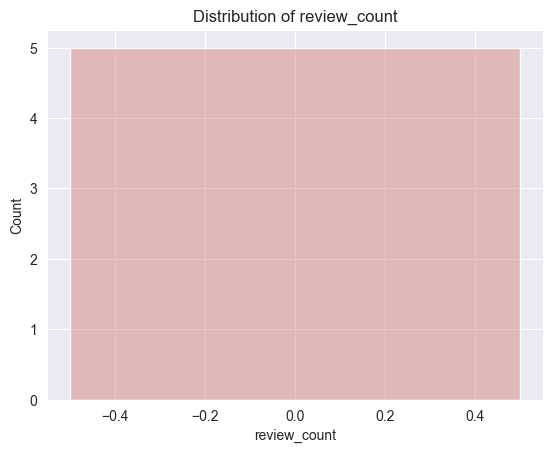


--- Categorical Data Visualization ---


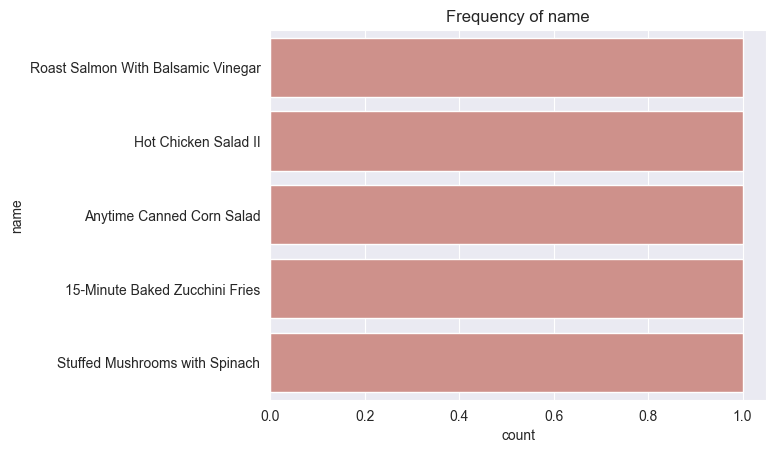

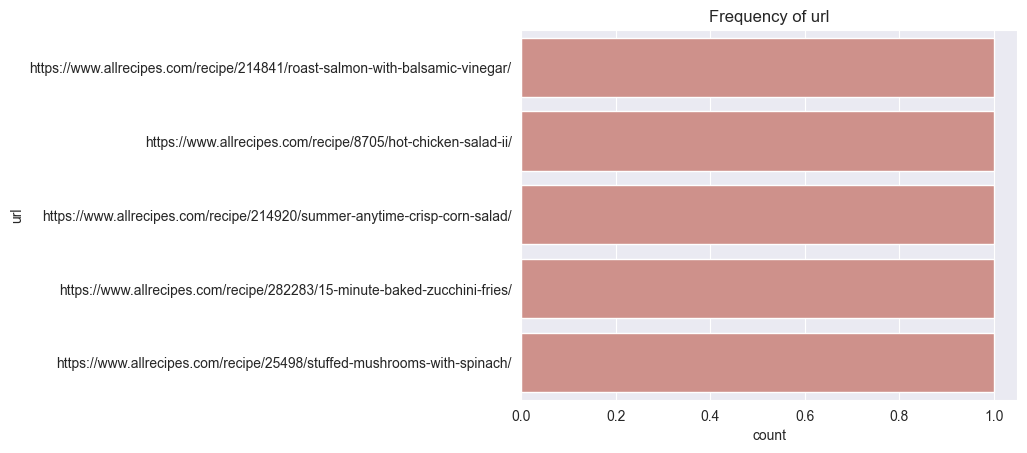

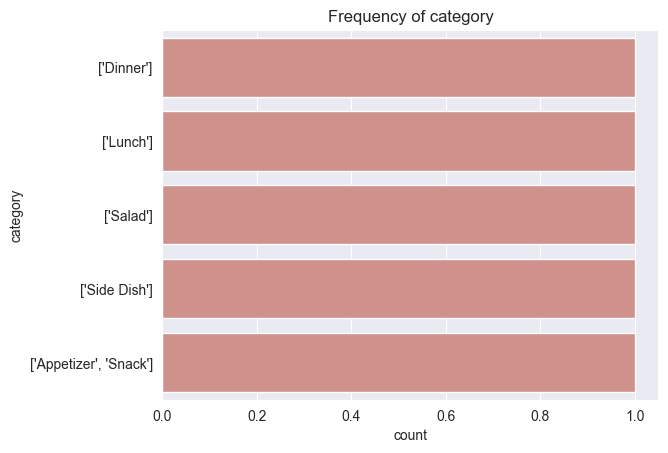

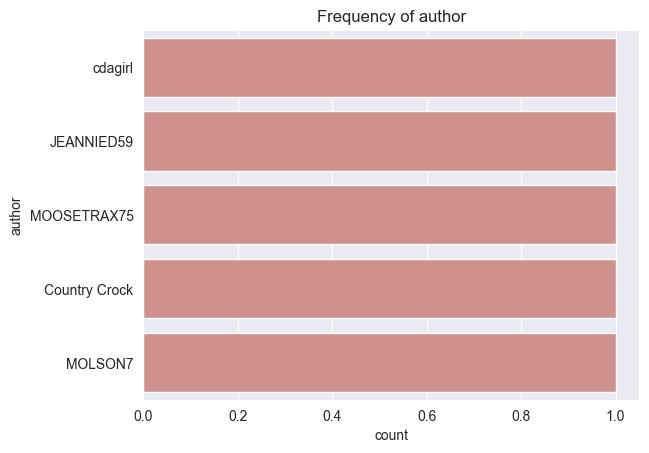

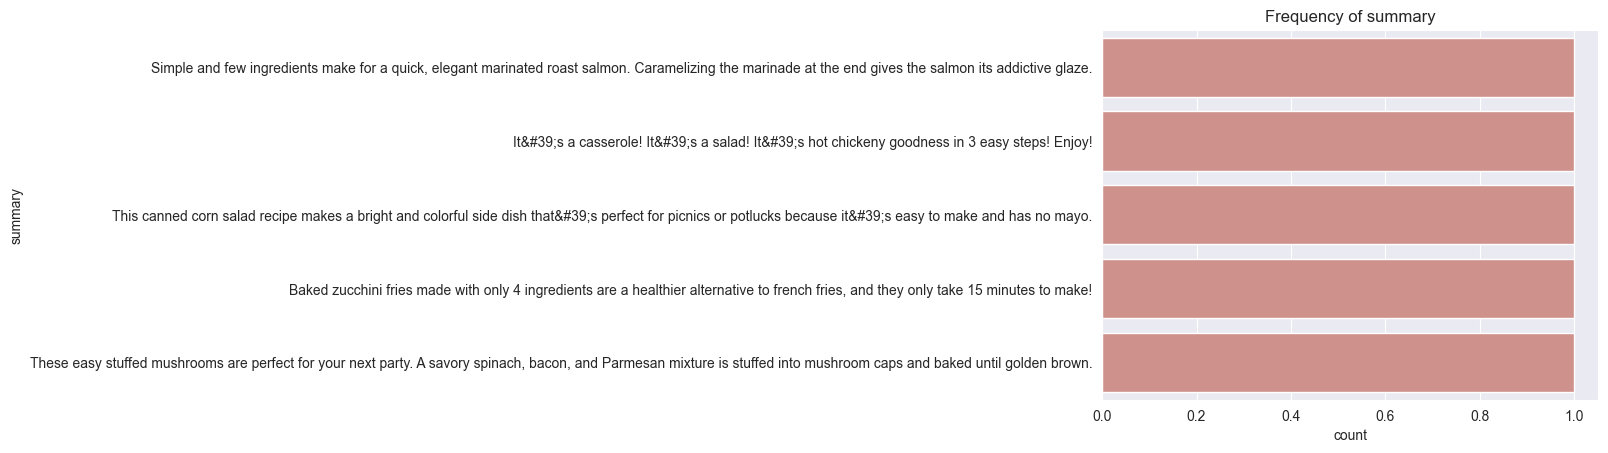

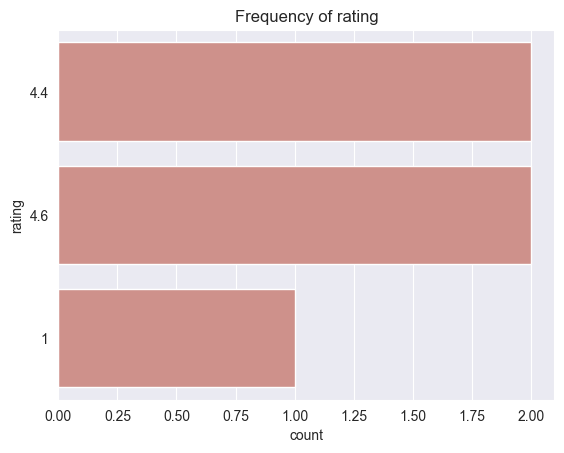

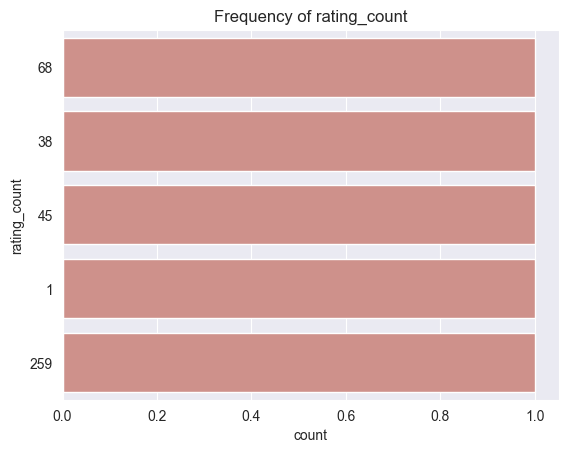

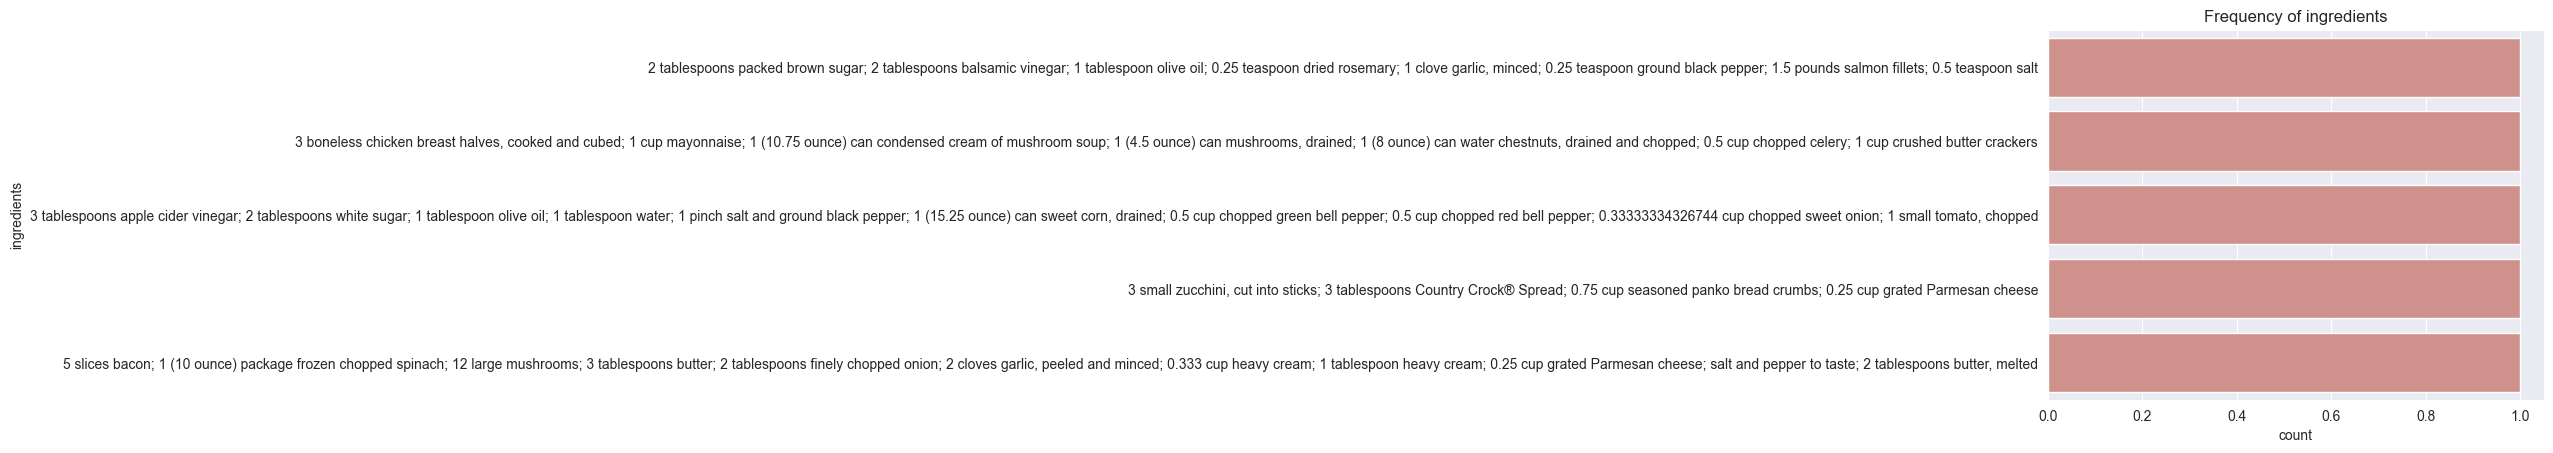

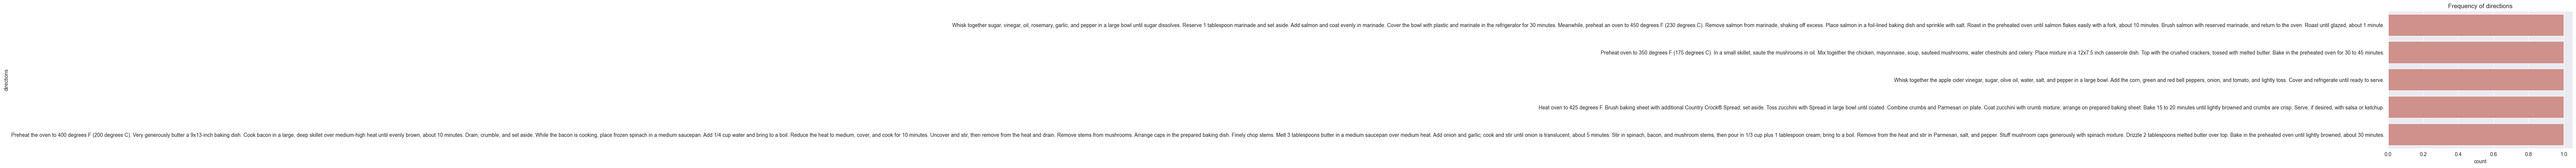

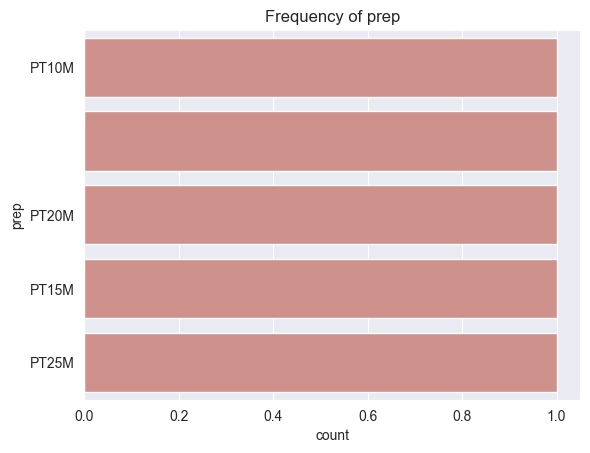

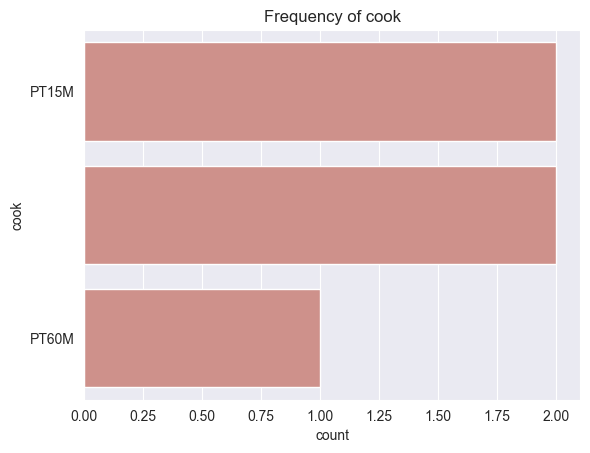

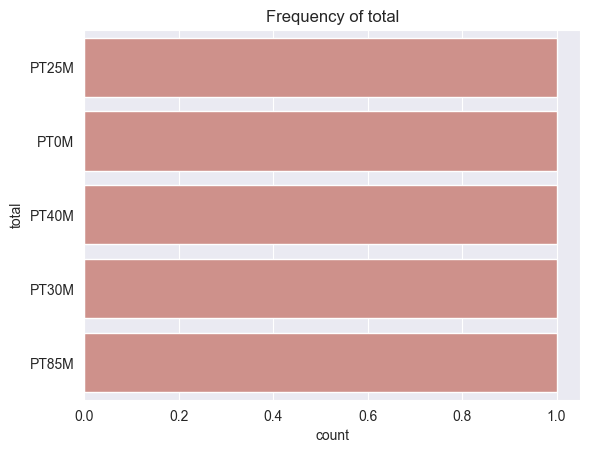

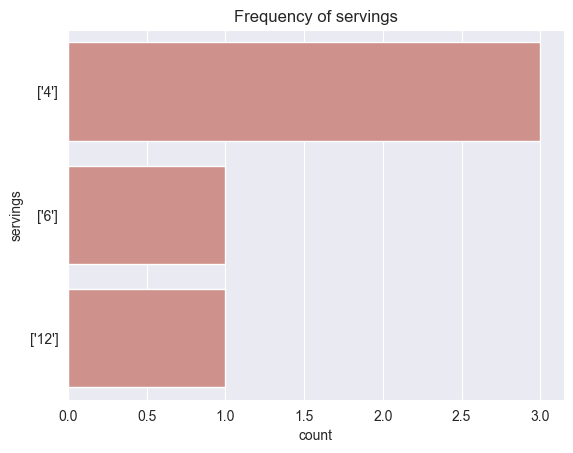

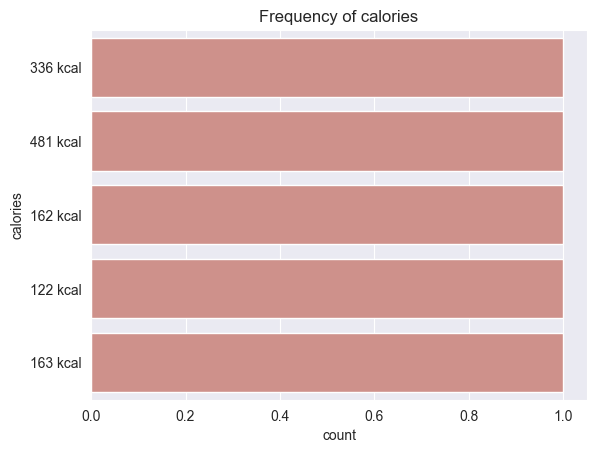

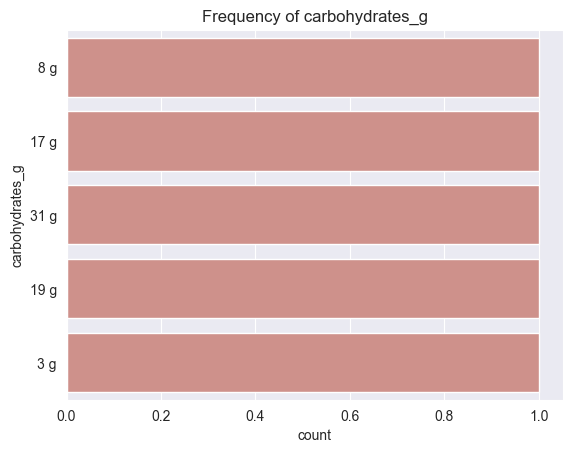

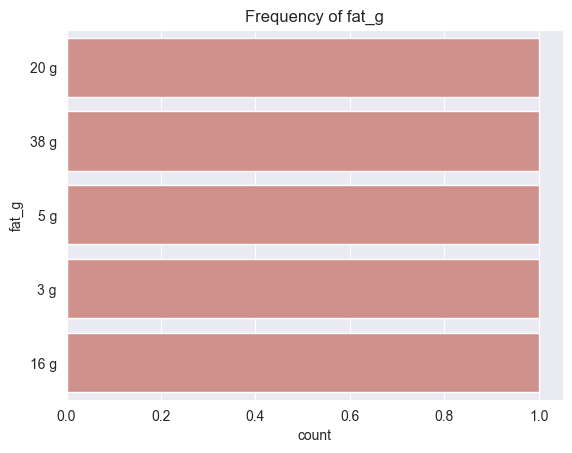

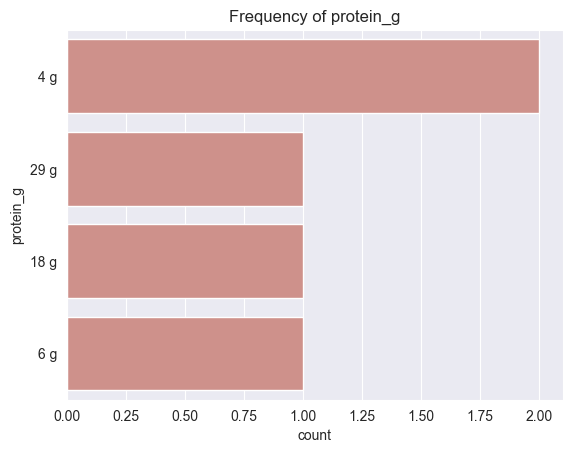

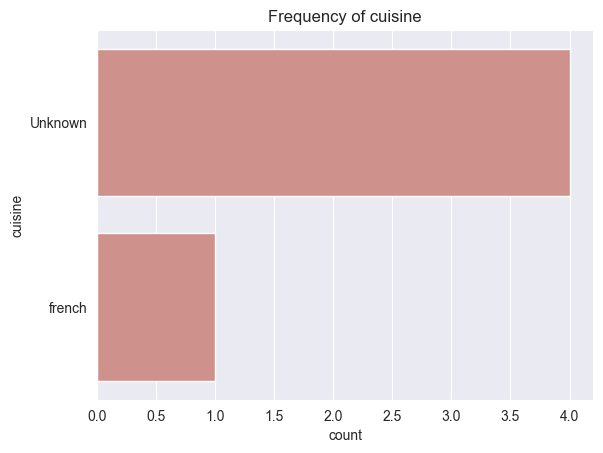

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)
pd.set_option('expand_frame_repr', False)

# Set seaborn styles
sns.set_style("darkgrid")
colors = ['#D98880', '#7FB3D5', '#76D7C4', '#F8C471', '#C39BD3']
sns.set_palette(sns.color_palette(colors))

# Load JSON filealysis
# Load JSON file with multi-JSON handling
# Load JSON file with error handling for blank or invalid lines
# Load JSON file with detailed logging for invalid lines
def load_json_file(file_path):
    """
    Load a JSON file into a pandas DataFrame, ensuring all lines are processed or logged.
    """
    valid_data = []  # Store valid JSON objects
    invalid_lines = []  # Store invalid lines for review

    try:
        with open(file_path, 'r') as file:
            for line_number, line in enumerate(file, start=1):
                line = line.strip()  # Remove leading/trailing whitespace
                if not line:  # Skip blank lines
                    continue
                try:
                    # Attempt to parse each line as JSON
                    valid_data.append(json.loads(line))
                except json.JSONDecodeError as e:
                    # Log the error and the problematic line
                    invalid_lines.append((line_number, line, str(e)))

        if invalid_lines:
            print("\n--- Invalid Lines Detected ---")
            for line_number, line, error in invalid_lines:
                print(f"Line {line_number}: {error}\n{line}")

        if valid_data:
            return pd.DataFrame(valid_data)
        else:
            raise ValueError("No valid JSON objects found in the file.")
    except Exception as e:
        print(f"Error loading JSON file: {e}")
        return None

def analyze_data(df):
    """
    Perform a preliminary analysis on the dataset.
    """
    print("\n--- Dataset Overview ---")
    print(df.info())
    print("\n--- First Few Rows ---")
    print(df.head())
    print("\n--- Summary Statistics ---")
    print(df.describe(include='all'))

# Visualization examples
def visualize_data(df):
    """
    Example visualizations for numerical and categorical data.
    """
    # Check if there are numerical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if len(numerical_cols) > 0:
        print("\n--- Numerical Data Visualization ---")
        for col in numerical_cols:
            sns.histplot(df[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.show()
    
    # Check if there are categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print("\n--- Categorical Data Visualization ---")
        for col in categorical_cols:
            sns.countplot(y=df[col], order=df[col].value_counts().index)
            plt.title(f"Frequency of {col}")
            plt.show()

# Main execution
if __name__ == "__main__":
    # Specify the JSON file path
    file_path = 'output.json'
    data = load_json_file(file_path)
    
    if data is not None:
        analyze_data(data)
        visualize_data(data)
